In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/earthquake.csv')
df.shape, df.columns.tolist()


((1000, 19),
 ['title',
  'magnitude',
  'date_time',
  'cdi',
  'mmi',
  'alert',
  'tsunami',
  'sig',
  'net',
  'nst',
  'dmin',
  'gap',
  'magType',
  'depth',
  'latitude',
  'longitude',
  'location',
  'continent',
  'country'])

In [2]:
display(df.head())
display(df.info())
display(df.describe(include='all').T)

if 'target' in df.columns:
    target = 'target'
else:

    target = df.columns[-1]
print("Assumed target column (change if wrong):", target)


miss = df.isnull().sum().sort_values(ascending=False)
display(miss[miss>0].head(30))


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1000,984,"M 6.5 - Kermadec Islands, New Zealand",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magnitude,1000.0,NaN,NaN,NaN,6.94015,0.438148,6.5,6.6,6.8,7.1,9.1
date_time,1000,990,11-01-2022 12:39,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cdi,1000.0,NaN,NaN,NaN,3.605,3.328972,0.0,0.0,4.0,7.0,9.0
mmi,1000.0,NaN,NaN,NaN,6.027,1.43399,1.0,5.0,6.0,7.0,10.0
alert,449,4,green,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsunami,1000.0,NaN,NaN,NaN,0.325,0.468609,0.0,0.0,0.0,1.0,1.0
sig,1000.0,NaN,NaN,NaN,847.915,301.802632,650.0,691.0,744.0,874.25,2910.0
net,1000,11,us,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nst,1000.0,NaN,NaN,NaN,193.918,239.045858,0.0,0.0,0.0,403.0,934.0


Assumed target column (change if wrong): country


,0
continent,716
alert,551
country,349
location,6


In [3]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", len(num_cols), "Categorical columns:", len(cat_cols))

Numeric columns: 11 Categorical columns: 8


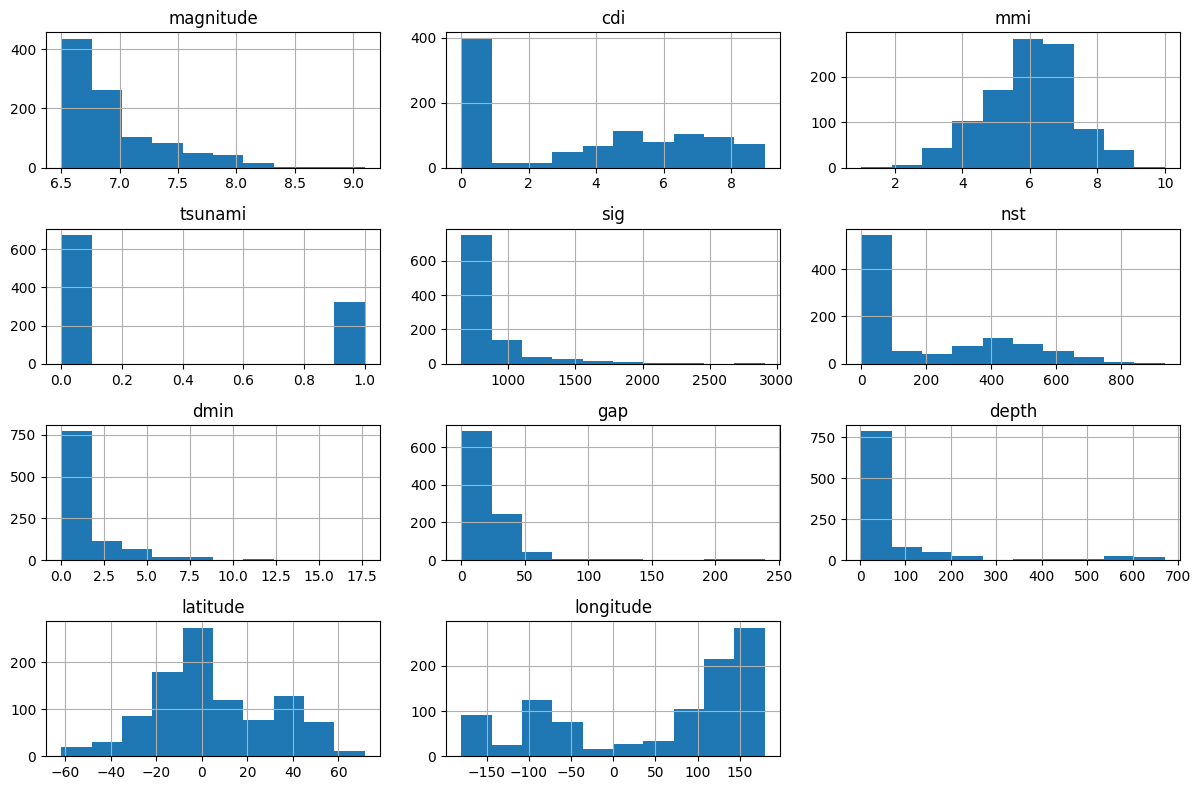

In [4]:
if len(num_cols)>0:
    df[num_cols].hist(figsize=(12,8))
    plt.tight_layout()

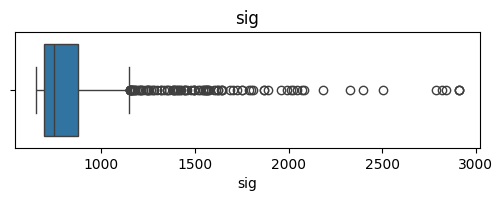

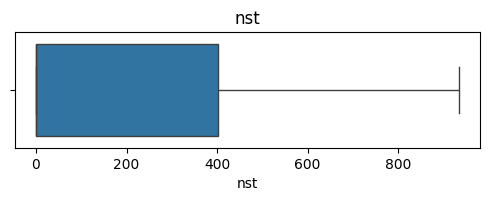

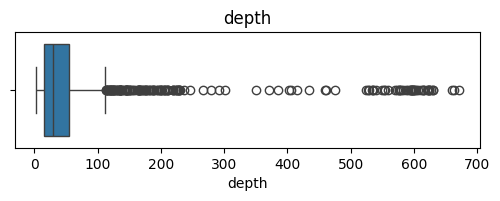

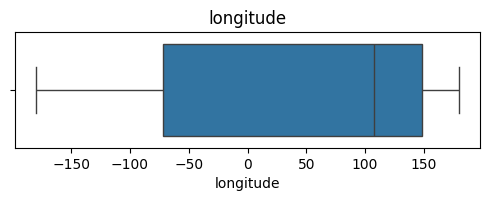

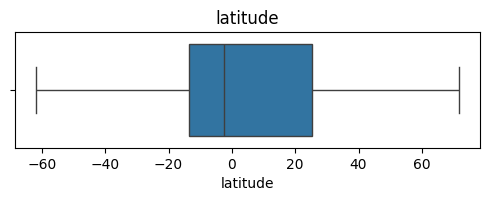

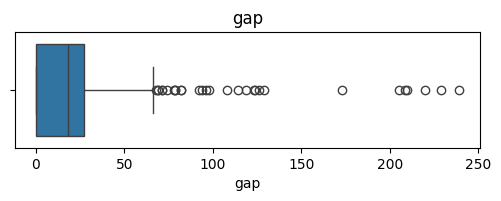

In [5]:
top_var = df[num_cols].var().sort_values(ascending=False).index[:6].tolist()
for c in top_var:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[c])
    plt.title(c)
    plt.show()

===  title ===
 title
M 6.5 - Kermadec Islands, New Zealand    3
M 6.9 -                                  3
M 6.7 - 91 km SE of Nikolski, Alaska     2
M 6.5 - 71 km SE of Nikolski, Alaska     2
M 6.6 - Nicobar Islands, India region    2
M 6.5 - Kermadec Islands region          2
M 6.9 - Kermadec Islands, New Zealand    2
M 6.8 - south of the Fiji Islands        2
M 6.9 - South Sandwich Islands region    2
M 6.7 - Sea of Okhotsk                   2
Name: count, dtype: int64


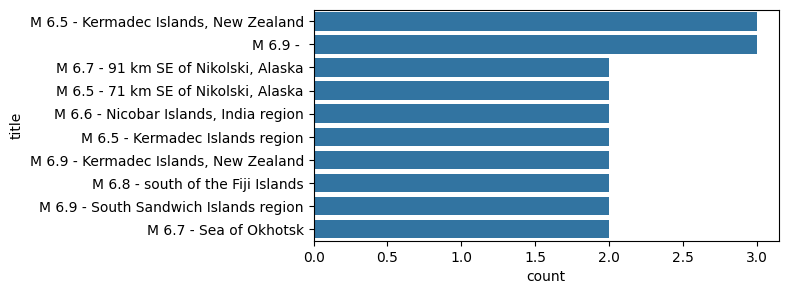

===  date_time ===
 date_time
11-01-2022 12:39    3
11-01-2022 11:35    3
16-07-2023 06:48    2
12-09-2007 23:49    2
19-07-2008 02:39    2
03-05-2006 15:26    2
14-08-2021 11:57    2
29-07-2021 06:15    2
12-12-2005 21:47    1
04-01-2006 08:32    1
Name: count, dtype: int64


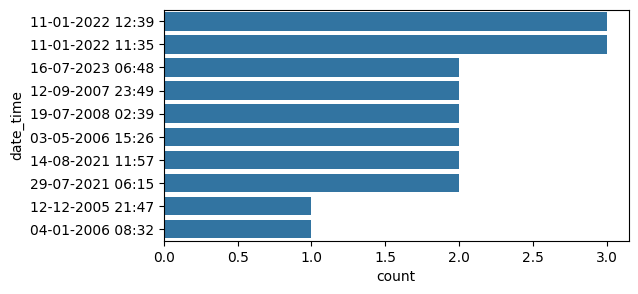

===  alert ===
 alert
green     353
yellow     59
orange     24
red        13
Name: count, dtype: int64


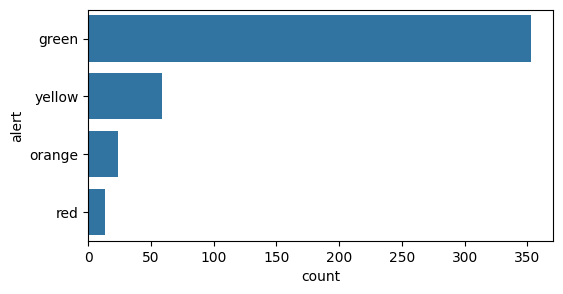

===  net ===
 net
us          960
ak           13
official      9
duputel       3
at            3
nc            3
ci            3
pt            2
hv            2
nn            1
Name: count, dtype: int64


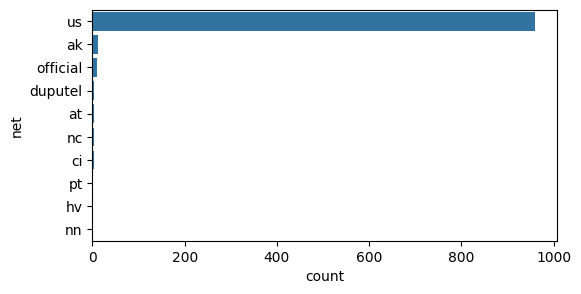

===  magType ===
 magType
mww    502
mwc    332
mwb    100
mw      51
Mi       5
mb       4
ms       3
md       2
ml       1
Name: count, dtype: int64


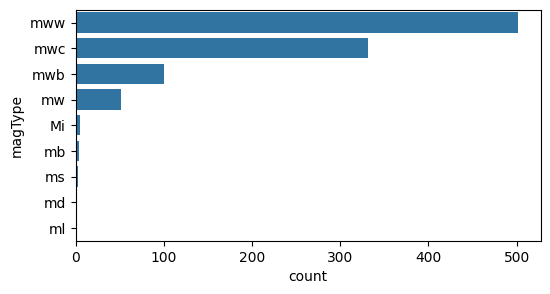

In [6]:
for c in cat_cols[:5]:
    print("=== ", c, "===\n", df[c].value_counts().head(10))
    plt.figure(figsize=(6,3))
    sns.countplot(y=c, data=df, order=df[c].value_counts().index[:10])
    plt.show()

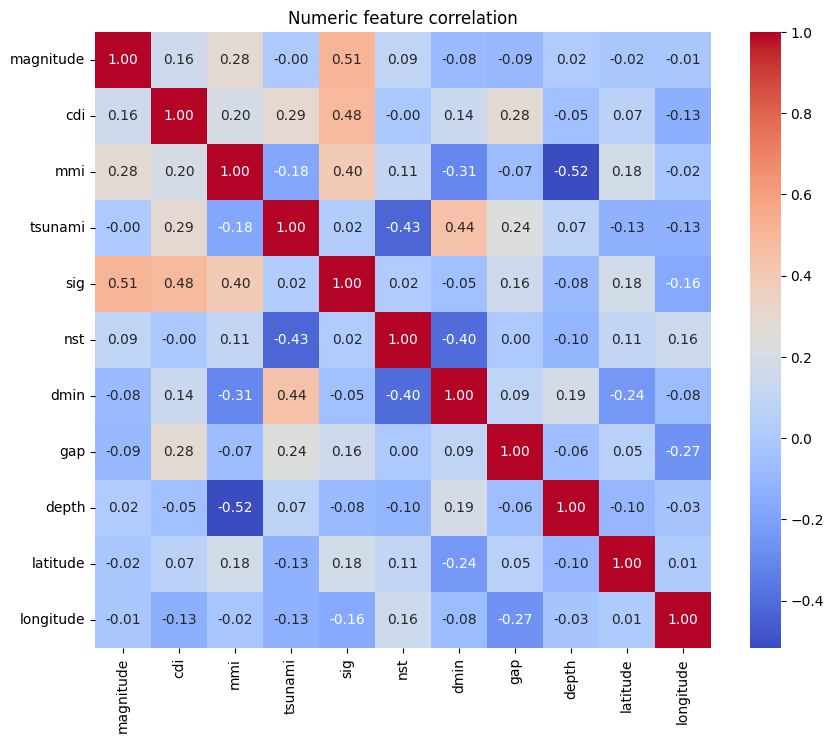

In [7]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Numeric feature correlation')
plt.show()

In [8]:
for c in num_cols:
    if df[c].isnull().sum()>0:
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    if df[c].isnull().sum()>0:
        df[c] = df[c].fillna(df[c].mode()[0])

display(df.isnull().sum().sum())

np.int64(0)

In [9]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("After get_dummies, shape:", df.shape)

After get_dummies, shape: (1000, 2565)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols_after = [c for c in df.columns if c in num_cols]
if len(num_cols_after)>0:
    df[num_cols_after] = scaler.fit_transform(df[num_cols_after])

In [ ]:
target = 'magnitude'

from sklearn.preprocessing import LabelEncoder

y = df[target]
X = df.drop(columns=[target])

if y.dtype == 'object' or y.dtype.name == 'category':
    y_for_corr = LabelEncoder().fit_transform(y)
    corr_df = df.copy()
    corr_df['_y_tmp'] = y_for_corr
    corr_with_target = corr_df.corr(numeric_only=True)['_y_tmp'].abs().sort_values(ascending=False)
else:
    corr_with_target = df.corr(numeric_only=True)[target].abs().sort_values(ascending=False)

print("Top features by absolute correlation with target:")
display(corr_with_target.head(20))


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import LabelEncoder
X_num = X.select_dtypes(include=[np.number]).fillna(0)
y_enc = y
if y.dtype == 'object' or y.dtype.name == 'category':
    y_enc = LabelEncoder().fit_transform(y)
if len(np.unique(y_enc)) <= 20 and not np.issubdtype(y_enc.dtype, np.floating):
    scorer = f_classif
else:
    scorer = f_regression

k = min(10, X_num.shape[1])
sel = SelectKBest(score_func=scorer, k=k).fit(X_num, y_enc)
selected_cols = X_num.columns[sel.get_support()].tolist()
print("SelectKBest top", k, "features:", selected_cols)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
X_model = X.fillna(0)
y_model = y
if y_model.dtype == 'object' or y_model.dtype.name == 'category':
    y_model = LabelEncoder().fit_transform(y_model)

if len(np.unique(y_model)) <= 20 and not np.issubdtype(y_model.dtype, np.floating):
    model = RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=-1, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, max_depth=7, n_jobs=-1, random_state=42)
if X_model.shape[1] > 300:
    X_model = X_model.sample(n=1000, axis=0, random_state=1) if X_model.shape[0]>1000 else X_model
    y_model = y_model[:len(X_model)]

model.fit(X_model, y_model)
importances = pd.Series(model.feature_importances_, index=X_model.columns).sort_values(ascending=False)
display(importances.head(30))
importances.head(15).sort_values().plot(kind='barh', figsize=(6,6))
plt.title('Top feature importances (RF)')
plt.show()

In [ ]:
top_feats = importances.head(10).index.tolist()
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
Xb = df[top_feats].fillna(0)
yb = y_model
if len(np.unique(yb)) <= 20 and not np.issubdtype(yb.dtype, np.floating):
    clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    scores = cross_val_score(clf, Xb, yb, cv=5, scoring='accuracy')
    print("CV accuracy:", scores.mean(), scores)
else:
    clf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    scores = cross_val_score(clf, Xb, yb, cv=5, scoring='r2')
    print("CV R2:", scores.mean(), scores)

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
